<a href="https://colab.research.google.com/github/Shantanu-Meta/GoogleCollab/blob/main/Lab_mid_sem_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
# Create a dictionary with the data
data = {'Roll Number': [1, 2, 3, 4, 5],
        'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
        'Total Marks': [80, 90, 75, 85, 95],
        'Class': ['A', 'B', 'A', 'C', 'B']}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

# Sort the DataFrame by Name and then by Total Marks
df_sorted = df.sort_values(by=['Name', 'Total Marks'])

# Print the sorted DataFrame
print(df_sorted)

   Roll Number     Name  Total Marks Class
0            1    Alice           80     A
1            2      Bob           90     B
2            3  Charlie           75     A
3            4    David           85     C
4            5      Eve           95     B


In [ ]:
from google.colab import drive
drive.mount("/content/Heart.csv")

ValueError: Mountpoint must either be a directory or not exist

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Heart.csv to Heart.csv


In [ ]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['Heart.csv']))
print(df)

     Unnamed: 0  Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  \
0             1   63    1       typical     145   233    1        2    150   
1             2   67    1  asymptomatic     160   286    0        2    108   
2             3   67    1  asymptomatic     120   229    0        2    129   
3             4   37    1    nonanginal     130   250    0        0    187   
4             5   41    0    nontypical     130   204    0        2    172   
..          ...  ...  ...           ...     ...   ...  ...      ...    ...   
298         299   45    1       typical     110   264    0        0    132   
299         300   68    1  asymptomatic     144   193    1        0    141   
300         301   57    1  asymptomatic     130   131    0        0    115   
301         302   57    0    nontypical     130   236    0        2    174   
302         303   38    1    nonanginal     138   175    0        0    173   

     ExAng  Oldpeak  Slope   Ca        Thal  AHD  
0        0  

In [ ]:
df.shape

(303, 15)

In [ ]:
df_ex = df[['Age', 'Sex', 'ChestPain', 'RestBP', 'Chol']]

In [ ]:
print(df_ex)

     Age  Sex     ChestPain  RestBP  Chol
0     63    1       typical     145   233
1     67    1  asymptomatic     160   286
2     67    1  asymptomatic     120   229
3     37    1    nonanginal     130   250
4     41    0    nontypical     130   204
..   ...  ...           ...     ...   ...
298   45    1       typical     110   264
299   68    1  asymptomatic     144   193
300   57    1  asymptomatic     130   131
301   57    0    nontypical     130   236
302   38    1    nonanginal     138   175

[303 rows x 5 columns]


In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df_ex, test_size=0.2, random_state=42)

In [ ]:
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 242
Rows in test set: 61



In [ ]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
X_train = train_set[['Age', 'Sex', 'RestBP', 'Chol']]  # Features
X_test = test_set[['Age', 'Sex', 'RestBP', 'Chol']]    # Features
y_train_class = train_set['ChestPain']  # For classification tasks
y_test_class = test_set['ChestPain']    # For classification tasks
y_train_reg = train_set['RestBP']       # For regression task (linear regression)
y_test_reg = test_set['RestBP']

logistic_model = LogisticRegression(max_iter=2000)
logistic_model.fit(X_train, y_train_class)
y_pred_logreg = logistic_model.predict(X_test)

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train_class)
y_pred_knn = knn_model.predict(X_test)

linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train_reg)
y_pred_linreg = linear_reg_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Separate features (X) and target variable (y)
X_train = train_set[['Age', 'Sex', 'RestBP', 'Chol']]  # Features
X_test = test_set[['Age', 'Sex', 'RestBP', 'Chol']]    # Features
y_train_class = train_set['ChestPain']  # For classification tasks
y_test_class = test_set['ChestPain']    # For classification tasks
y_train_reg = train_set['RestBP']       # For regression task (linear regression)
y_test_reg = test_set['RestBP']         # For regression task (linear regression)

# Step 1: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1. Logistic Regression (classification)
logistic_model = LogisticRegression(max_iter=2000)
logistic_model.fit(X_train_scaled, y_train_class)
y_pred_logreg = logistic_model.predict(X_test_scaled)
print(f'Logistic Regression Predictions: {y_pred_logreg}')

# 2. K-Nearest Neighbors (KNN) Classification
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_scaled, y_train_class)
y_pred_knn = knn_model.predict(X_test_scaled)
print(f'KNN Predictions: {y_pred_knn}')

# 3. Linear Regression (for predicting RestBP)
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train_scaled, y_train_reg)
y_pred_linreg = linear_reg_model.predict(X_test_scaled)
print(f'Linear Regression Predictions: {y_pred_linreg}')


Logistic Regression Predictions: ['asymptomatic' 'asymptomatic' 'asymptomatic' 'asymptomatic'
 'asymptomatic' 'asymptomatic' 'asymptomatic' 'asymptomatic'
 'asymptomatic' 'asymptomatic' 'asymptomatic' 'nontypical' 'asymptomatic'
 'asymptomatic' 'asymptomatic' 'asymptomatic' 'nonanginal' 'asymptomatic'
 'asymptomatic' 'nonanginal' 'asymptomatic' 'asymptomatic' 'asymptomatic'
 'nonanginal' 'asymptomatic' 'nontypical' 'asymptomatic' 'asymptomatic'
 'asymptomatic' 'asymptomatic' 'asymptomatic' 'asymptomatic' 'nonanginal'
 'asymptomatic' 'asymptomatic' 'nontypical' 'asymptomatic' 'asymptomatic'
 'asymptomatic' 'asymptomatic' 'asymptomatic' 'asymptomatic'
 'asymptomatic' 'asymptomatic' 'asymptomatic' 'asymptomatic'
 'asymptomatic' 'asymptomatic' 'asymptomatic' 'asymptomatic'
 'asymptomatic' 'nonanginal' 'asymptomatic' 'asymptomatic' 'asymptomatic'
 'asymptomatic' 'asymptomatic' 'asymptomatic' 'asymptomatic'
 'asymptomatic' 'asymptomatic']
KNN Predictions: ['asymptomatic' 'asymptomatic' 'nont

0.6065573770491803
Logistic Regression Classification Report:
              precision    recall  f1-score   support

asymptomatic       0.64      0.94      0.76        36
  nonanginal       0.40      0.12      0.19        16
  nontypical       0.33      0.12      0.18         8
     typical       0.00      0.00      0.00         1

    accuracy                           0.61        61
   macro avg       0.34      0.30      0.28        61
weighted avg       0.53      0.61      0.52        61

Logistic Regression Confusion Matrix:
[[34  1  1  0]
 [14  2  0  0]
 [ 5  2  1  0]
 [ 0  0  1  0]]
0.4918032786885246
KNN Classification Report:
              precision    recall  f1-score   support

asymptomatic       0.60      0.72      0.66        36
  nonanginal       0.27      0.19      0.22        16
  nontypical       0.17      0.12      0.14         8
     typical       0.00      0.00      0.00         1

    accuracy                           0.49        61
   macro avg       0.26      0.2

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


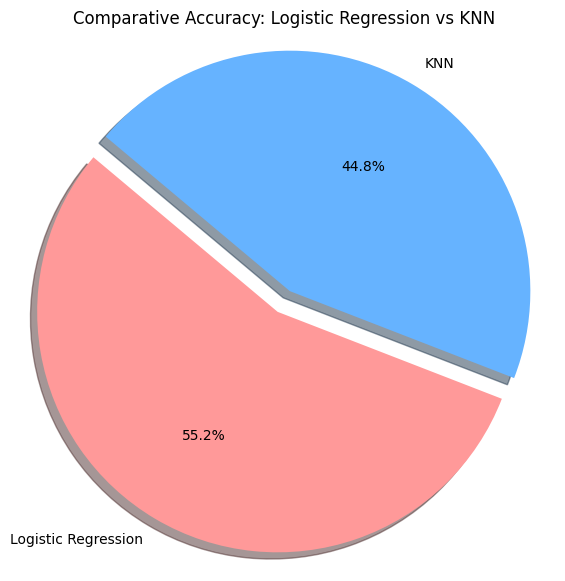

In [ ]:
# Import necessary libraries
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt

# 1. Logistic Regression
y_pred_logreg = logistic_model.predict(X_test_scaled)
logreg_accuracy = accuracy_score(y_test_class, y_pred_logreg)
print(logreg_accuracy)
print("Logistic Regression Classification Report:")
print(classification_report(y_test_class, y_pred_logreg))
logreg_cm = confusion_matrix(y_test_class, y_pred_logreg)
print("Logistic Regression Confusion Matrix:")
print(logreg_cm)

# 2. K-Nearest Neighbors (KNN)
y_pred_knn = knn_model.predict(X_test_scaled)
knn_accuracy = accuracy_score(y_test_class, y_pred_knn)
print(knn_accuracy)
print("KNN Classification Report:")
print(classification_report(y_test_class, y_pred_knn))
knn_cm = confusion_matrix(y_test_class, y_pred_knn)
print("KNN Confusion Matrix:")
print(knn_cm)

# 3. Comparative Study using Pie Chart (Accuracy comparison)
labels = ['Logistic Regression', 'KNN']
sizes = [logreg_accuracy, knn_accuracy]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # explode the first slice (Logistic Regression)

plt.figure(figsize=(7, 7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.
plt.title('Comparative Accuracy: Logistic Regression vs KNN')
plt.show()
